In [1]:
#import all libraries needed 
import os
import pandas as pd

from api_keys import wkey
from api_keys import gkey
import gmaps
import gmaps.datasets
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress


In [2]:
#Get Path to get to the Datasets
firepath = os.path.join('Data Sets', 'California_Fire_Incidents.csv')
singlepath = os.path.join('Data Sets','City_zhvi_single_family.csv')

#read the files 
fire = pd.read_csv(firepath)
singlecity = pd.read_csv(singlepath)

In [3]:
#Collecting only the columns we want 
clfire = fire[['Name','AcresBurned','ArchiveYear','Counties','Started','Extinguished', 'Latitude',
       'Longitude','Fatalities','Injuries','StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened','Location']]
#sort the columns by Acres Burned
clfire.sort_values(by ='AcresBurned',ascending = False)

,Name,AcresBurned,ArchiveYear,Counties,Started,Extinguished,Latitude,Longitude,Fatalities,Injuries,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,Location
1055,Ranch Fire (Mendocino Complex),410203.0,2018,Glenn,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,39.243283,-123.103367,1.0,3.0,NaN,246.0,NaN,1050.0,"off Highway 20 near Potter Valley, northeast o..."
1054,Ranch Fire (Mendocino Complex),410203.0,2018,Colusa,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,39.243283,-123.103367,1.0,3.0,NaN,246.0,NaN,1050.0,"off Highway 20 near Potter Valley, northeast o..."
1056,Ranch Fire (Mendocino Complex),410203.0,2018,Lake,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,39.243283,-123.103367,1.0,3.0,NaN,246.0,NaN,1050.0,"off Highway 20 near Potter Valley, northeast o..."
1057,Ranch Fire (Mendocino Complex),410203.0,2018,Mendocino,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,39.243283,-123.103367,1.0,3.0,NaN,246.0,NaN,1050.0,"off Highway 20 near Potter Valley, northeast o..."
617,Thomas Fire,281893.0,2017,Ventura,2017-12-04T18:28:00Z,2019-03-14T11:24:00Z,34.415210,-119.091240,NaN,NaN,280.0,1063.0,NaN,NaN,"Hwy 150 and Hwy 126, north of Santa Paula"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Rattlesnake Fire,0.0,2017,Mariposa,2017-09-07T15:00:00Z,2018-01-09T13:19:00Z,37.735960,-119.782560,NaN,NaN,NaN,NaN,NaN,NaN,Hwy 120 and Big Oak Flat Road near Foresta
613,Old Fire,0.0,2016,Los Angeles,2016-06-04T16:09:00Z,2016-06-13T12:30:00Z,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,off of Old Topanga Canyon Road and Mulholland ...
1633,Cashe Fire,NaN,2019,Yolo,2019-11-25T12:02:02Z,NaN,38.734634,-121.729691,NaN,NaN,NaN,NaN,NaN,NaN,"County Road 102 and County Road 17, North of W..."
1634,Oak Fire,NaN,2019,San Diego,2019-10-22T19:20:44Z,NaN,33.351145,-117.403719,NaN,NaN,NaN,NaN,NaN,NaN,"Near Basilone Road and Las Pulgas Road, near C..."


In [4]:
#selecting the columns we want
clsinglecity = singlecity[["RegionID","SizeRank","RegionName","RegionType","StateName","State","Metro","CountyName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30']] 

clsinglecity

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2012-12-31,2013-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,456770.0,457813.0,...,672936.0,672209.0,671450.0,671253.0,671526.0,671719.0,671601.0,672261.0,672389.0,673213.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,450942.0,456335.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,123220.0,124046.0,...,192561.0,193168.0,193616.0,194133.0,194270.0,194724.0,195586.0,196630.0,197445.0,197941.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,157394.0,158940.0,...,228316.0,228191.0,228145.0,228217.0,228561.0,229004.0,229648.0,230000.0,230383.0,230957.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,125317.0,126125.0,...,186918.0,187543.0,188271.0,188410.0,188913.0,189028.0,189564.0,189684.0,189929.0,190068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26492,51821,29449,Eastabuchie,City,MS,MS,Laurel,Jones County,64854.0,65194.0,...,81352.0,81091.0,81224.0,81612.0,82230.0,83016.0,83265.0,83905.0,84212.0,84165.0
26493,232607,29449,Dean,City,TX,TX,Wichita Falls,Clay County,124149.0,124473.0,...,181453.0,181941.0,182497.0,182893.0,183317.0,183288.0,183121.0,182587.0,181882.0,181599.0
26494,6638,29449,Pulaski,City,GA,GA,NaN,Candler County,63066.0,63485.0,...,97205.0,97299.0,97627.0,97836.0,98273.0,98746.0,99501.0,100522.0,101658.0,102356.0
26495,33089,29449,New Paris,City,PA,PA,NaN,Bedford County,NaN,NaN,...,151755.0,152421.0,153723.0,154705.0,155025.0,155328.0,155871.0,156029.0,155906.0,154597.0


In [5]:
#Grabing fires in Northern California only
Nfire = clfire.loc[clfire['Latitude'].gt(37)==True]
Nfire.sort_values(by ='AcresBurned',ascending = False)
Nfire = pd.DataFrame(Nfire)
Nfire['Extinguished'] = Nfire['Extinguished'].astype(str)
Nfire = pd.DataFrame(Nfire)

#Standardizing the Started Data by getting rid of the time 
for index, row in Nfire.iterrows():
    start= row[4]
    finish = row[5]
    Nfire.loc[index,'Started'] = start.split("T")[0]
    Nfire.loc[index,'Extinguished'] = finish.split('T')[0]

    
#Standardizing the Started Data  by converting the Date format to match that of the City Data Year-Month-Day(number of days in month)
for index, row in Nfire.iterrows():
    date =""
    month = row[4].split('-')[1]
    year = row[4].split('-')[0]
    if month == "01" or month == "03" or month == "05" or month == "07"or month == "08"or  month == "10" or month == "12":
        Nfire.loc[index,'Started'] = f"{year}-{month}-31"
    elif month == "04" or month == "06" or month == "09" or month == "11":
        Nfire.loc[index,'Started'] = f"{year}-{month}-30"
    elif month == "02" :
        Nfire.loc[index,'Started'] = f"{year}-{month}-28"

Nfire

,Name,AcresBurned,ArchiveYear,Counties,Started,Extinguished,Latitude,Longitude,Fatalities,Injuries,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,Location
0,Rim Fire,257314.0,2013,Tuolumne,2013-08-31,2013-09-06,37.857000,-120.086000,NaN,NaN,NaN,NaN,NaN,NaN,3 miles east of Groveland along Hwy 120
3,American Fire,27440.0,2013,Placer,2013-08-31,2013-08-30,39.120000,-120.650000,NaN,NaN,NaN,NaN,NaN,NaN,"Deadwood Ridge, northeast of Foresthill"
5,Aspen Fire,22992.0,2013,Fresno,2013-07-31,2013-09-24,37.279000,-119.318000,NaN,NaN,NaN,NaN,NaN,NaN,Seven miles north of Big Creek
7,Salmon River Complex,14754.0,2013,Siskiyou,2013-07-31,2013-08-31,41.320000,-123.176000,NaN,NaN,NaN,NaN,NaN,NaN,"North Fork of the Salmon River, West of Sawyer..."
8,Corral Complex,12503.0,2013,Humboldt,2013-08-31,2013-08-12,41.035000,-123.488000,NaN,NaN,NaN,NaN,NaN,NaN,Tish Tang Ridge east of Hoopa Valley Reservation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,Moms Fire,10.0,2019,Butte,2019-07-31,nan,39.423833,-121.579738,NaN,NaN,NaN,NaN,NaN,NaN,"Off Moms Lane and Lone Tree Road, South of Orv..."
1629,IronGate Fire,10.0,2019,Siskiyou,2019-06-30,2019-06-21,41.946220,-122.401570,NaN,NaN,NaN,NaN,NaN,NaN,"Deer Run Road, east of Iron Gate Reservoir"
1630,Cana Fire,10.0,2019,Butte,2019-04-30,2019-05-08,39.839580,-121.957000,NaN,NaN,NaN,NaN,NaN,NaN,"Off Hamilton Nord Cana Hwy & Cana Hwy, northea..."
1632,Long Fire,2.0,2019,Nevada,2019-06-30,2019-06-28,39.409722,-121.000556,NaN,NaN,NaN,NaN,NaN,NaN,"Off of Long Point Road and Old Mill Road, Sou..."


In [6]:
#usinging only the cities in California
SingleCCal = clsinglecity.loc[clsinglecity['StateName'] =='CA']
SingleCCal

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2012-12-31,2013-01-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,450942.0,456335.0,...,759513.0,763224.0,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,474020.0,480412.0,...,725853.0,727571.0,730853.0,734733.0,740112.0,744208.0,748744.0,751096.0,753893.0,754223.0
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,588222.0,599714.0,...,1020573.0,1024151.0,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0
14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,824245.0,841667.0,...,1505519.0,1511407.0,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0
30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,174266.0,177728.0,...,350842.0,353592.0,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,29195,29449,Lockwood,City,CA,CA,Salinas,Monterey County,NaN,NaN,...,610914.0,613382.0,613047.0,613266.0,611159.0,610241.0,611718.0,615934.0,623633.0,631555.0
26406,36339,29449,Tecopa,City,CA,CA,NaN,Inyo County,NaN,NaN,...,34627.0,34688.0,34687.0,34614.0,34465.0,34328.0,34042.0,33631.0,33159.0,32578.0
26435,17380,29449,Challenge,City,CA,CA,Yuba City,Yuba County,129791.0,130369.0,...,211217.0,213588.0,215080.0,215313.0,215703.0,214733.0,212881.0,211004.0,208809.0,205041.0
26466,21913,29449,Honeydew,City,CA,CA,Eureka-Arcata-Fortuna,Humboldt County,NaN,NaN,...,672166.0,680526.0,688958.0,698685.0,707643.0,720505.0,733777.0,749997.0,767960.0,792172.0


In [7]:
#retrieving a list of the city names from the Single family owned homes
Single_City_Cal_List = SingleCCal['RegionName']
Single_City_Cal_List

1          Los Angeles
8            San Diego
11            San Jose
14       San Francisco
30          Sacramento
             ...      
26401         Lockwood
26406           Tecopa
26435        Challenge
26466         Honeydew
26472           Darwin
Name: RegionName, Length: 1108, dtype: object

In [8]:
#Creating lata and lng columns in the Single Family owned homes
SingleCCal['Latitude'] = ""
SingleCCal['Longitude'] =""
#creating lists to store the data of failed cities 
failedindex = []
failedcity = []
Lcounter = 0
SingleCCal = pd.DataFrame(SingleCCal)
#create a for loop to find the lat and lng of the cities 
for index, row in SingleCCal.iterrows():
    #connect to the Weather API to get latitude and longitude for the cities 
    target_city = f"{row[2]}, {row[7]}, California"
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)
    gapi = requests.get(target_url)
    gapi
    Lcounter +=1

    #create a try and fail to not break the code if the information isnt found
    try:
        #grabbing the data from the API and loading it onto the DF
        SingleCCal.loc[index,'Longitude'] = gapi.json()["results"][0]["geometry"]["location"]["lng"]
        SingleCCal.loc[index,'Latitude']  = gapi.json()["results"][0]["geometry"]["location"]["lat"]
        #print successful
        print(f'{Lcounter} Found {row[2]} in Google IPA, and Adding Latitude and Longitude')
    except:
        #print Failure
        print(f'{Lcounter} Failed at finding Latitude and Longitude for {row[2]}')
        #store city information
        failedcity.append(row[2])
        failedindex.append(index)

        
        

              

C:\Users\Lenny Ovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenny Ovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1 Found Los Angeles in Google IPA, and Adding Latitude and Longitude
2 Found San Diego in Google IPA, and Adding Latitude and Longitude
3 Found San Jose in Google IPA, and Adding Latitude and Longitude
4 Found San Francisco in Google IPA, and Adding Latitude and Longitude
5 Found Sacramento in Google IPA, and Adding Latitude and Longitude
6 Found Fresno in Google IPA, and Adding Latitude and Longitude
7 Found Long Beach in Google IPA, and Adding Latitude and Longitude
8 Found Oakland in Google IPA, and Adding Latitude and Longitude
9 Found Riverside in Google IPA, and Adding Latitude and Longitude
10 Found Bakersfield in Google IPA, and Adding Latitude and Longitude
11 Found Anaheim in Google IPA, and Adding Latitude and Longitude
12 Found Santa Ana in Google IPA, and Adding Latitude and Longitude
13 Found Stockton in Google IPA, and Adding Latitude and Longitude
14 Found Modesto in Google IPA, and Adding Latitude and Longitude
15 Found San Bernardino in Google IPA, and Adding Latitude

122 Found Baldwin Park in Google IPA, and Adding Latitude and Longitude
123 Found Spring Valley in Google IPA, and Adding Latitude and Longitude
124 Found San Ramon in Google IPA, and Adding Latitude and Longitude
125 Found Redlands in Google IPA, and Adding Latitude and Longitude
126 Found Folsom in Google IPA, and Adding Latitude and Longitude
127 Found Huntington Park in Google IPA, and Adding Latitude and Longitude
128 Found Petaluma in Google IPA, and Adding Latitude and Longitude
129 Found La Mesa in Google IPA, and Adding Latitude and Longitude
130 Found Lake Forest in Google IPA, and Adding Latitude and Longitude
131 Found Milpitas in Google IPA, and Adding Latitude and Longitude
132 Found Pleasanton in Google IPA, and Adding Latitude and Longitude
133 Found Tulare in Google IPA, and Adding Latitude and Longitude
134 Found Chino Hills in Google IPA, and Adding Latitude and Longitude
135 Found Lake Elsinore in Google IPA, and Adding Latitude and Longitude
136 Found San Rafael in

240 Found Sonoma in Google IPA, and Adding Latitude and Longitude
241 Found Wildomar in Google IPA, and Adding Latitude and Longitude
242 Found West Hollywood in Google IPA, and Adding Latitude and Longitude
243 Found Bell in Google IPA, and Adding Latitude and Longitude
244 Found Santa Paula in Google IPA, and Adding Latitude and Longitude
245 Found Placerville in Google IPA, and Adding Latitude and Longitude
246 Found Temple City in Google IPA, and Adding Latitude and Longitude
247 Found Calexico in Google IPA, and Adding Latitude and Longitude
248 Found Los Gatos in Google IPA, and Adding Latitude and Longitude
249 Found Barstow in Google IPA, and Adding Latitude and Longitude
250 Found Rubidoux in Google IPA, and Adding Latitude and Longitude
251 Found Beverly Hills in Google IPA, and Adding Latitude and Longitude
252 Found Pleasant Hill in Google IPA, and Adding Latitude and Longitude
253 Found Marysville in Google IPA, and Adding Latitude and Longitude
254 Found Manhattan Beach i

359 Found Lomita in Google IPA, and Adding Latitude and Longitude
360 Found Ojai in Google IPA, and Adding Latitude and Longitude
361 Found Coalinga in Google IPA, and Adding Latitude and Longitude
362 Found Lathrop in Google IPA, and Adding Latitude and Longitude
363 Found Laguna Beach in Google IPA, and Adding Latitude and Longitude
364 Found Bloomington in Google IPA, and Adding Latitude and Longitude
365 Found Albany in Google IPA, and Adding Latitude and Longitude
366 Found Nipomo in Google IPA, and Adding Latitude and Longitude
367 Found La Crescenta-Montrose in Google IPA, and Adding Latitude and Longitude
368 Found Nevada City in Google IPA, and Adding Latitude and Longitude
369 Found Lindsay in Google IPA, and Adding Latitude and Longitude
370 Found Pinole in Google IPA, and Adding Latitude and Longitude
371 Found Truckee in Google IPA, and Adding Latitude and Longitude
372 Found Malibu in Google IPA, and Adding Latitude and Longitude
373 Found Alpine in Google IPA, and Adding

477 Found Shasta Lake in Google IPA, and Adding Latitude and Longitude
478 Found Rancho Santa Fe in Google IPA, and Adding Latitude and Longitude
479 Found Cloverdale in Google IPA, and Adding Latitude and Longitude
480 Found Mariposa in Google IPA, and Adding Latitude and Longitude
481 Found Corte Madera in Google IPA, and Adding Latitude and Longitude
482 Found Rodeo in Google IPA, and Adding Latitude and Longitude
483 Found Muscoy in Google IPA, and Adding Latitude and Longitude
484 Found Rolling Hills Estates in Google IPA, and Adding Latitude and Longitude
485 Found Colfax in Google IPA, and Adding Latitude and Longitude
486 Found Marina del Rey in Google IPA, and Adding Latitude and Longitude
487 Found Woodlake in Google IPA, and Adding Latitude and Longitude
488 Found Pollock Pines in Google IPA, and Adding Latitude and Longitude
489 Found Earlimart in Google IPA, and Adding Latitude and Longitude
490 Found La Riviera in Google IPA, and Adding Latitude and Longitude
491 Found Pe

596 Found Hidden Valley Lake in Google IPA, and Adding Latitude and Longitude
597 Found Kennedy in Google IPA, and Adding Latitude and Longitude
598 Found Rescue in Google IPA, and Adding Latitude and Longitude
599 Found Cool in Google IPA, and Adding Latitude and Longitude
600 Found Keyes in Google IPA, and Adding Latitude and Longitude
601 Found Frazier Park in Google IPA, and Adding Latitude and Longitude
602 Found San Andreas in Google IPA, and Adding Latitude and Longitude
603 Found Bonsall in Google IPA, and Adding Latitude and Longitude
604 Found Penngrove in Google IPA, and Adding Latitude and Longitude
605 Found Morongo Valley in Google IPA, and Adding Latitude and Longitude
606 Found Del Monte Forest in Google IPA, and Adding Latitude and Longitude
607 Found Guerneville in Google IPA, and Adding Latitude and Longitude
608 Found Wheatland in Google IPA, and Adding Latitude and Longitude
609 Found Morada in Google IPA, and Adding Latitude and Longitude
610 Found Brisbane in Goo

715 Found Hamilton City in Google IPA, and Adding Latitude and Longitude
716 Found Sunol in Google IPA, and Adding Latitude and Longitude
717 Found Bayside in Google IPA, and Adding Latitude and Longitude
718 Found Fall River Mills in Google IPA, and Adding Latitude and Longitude
719 Found Potter Valley in Google IPA, and Adding Latitude and Longitude
720 Found Coulterville in Google IPA, and Adding Latitude and Longitude
721 Found Edwards in Google IPA, and Adding Latitude and Longitude
722 Found Tahoe City in Google IPA, and Adding Latitude and Longitude
723 Found Seven Trees in Google IPA, and Adding Latitude and Longitude
724 Found Belvedere in Google IPA, and Adding Latitude and Longitude
725 Found Crockett in Google IPA, and Adding Latitude and Longitude
726 Found Pauma Valley in Google IPA, and Adding Latitude and Longitude
727 Found Rough and Ready in Google IPA, and Adding Latitude and Longitude
728 Found Mendocino in Google IPA, and Adding Latitude and Longitude
729 Found Pil

834 Found Stonyford in Google IPA, and Adding Latitude and Longitude
835 Found Douglas City in Google IPA, and Adding Latitude and Longitude
836 Found Gazelle in Google IPA, and Adding Latitude and Longitude
837 Found Hidden Hills in Google IPA, and Adding Latitude and Longitude
838 Found Kernville in Google IPA, and Adding Latitude and Longitude
839 Found Santa Ysabel in Google IPA, and Adding Latitude and Longitude
840 Found Glenn in Google IPA, and Adding Latitude and Longitude
841 Found Klamath in Google IPA, and Adding Latitude and Longitude
842 Found Carlotta in Google IPA, and Adding Latitude and Longitude
843 Found Lagunitas in Google IPA, and Adding Latitude and Longitude
844 Found Gasquet in Google IPA, and Adding Latitude and Longitude
845 Found North San Juan in Google IPA, and Adding Latitude and Longitude
846 Found Canyon in Google IPA, and Adding Latitude and Longitude
847 Found Boulevard in Google IPA, and Adding Latitude and Longitude
848 Found Palos Verdes Peninsula i

953 Found Marshall in Google IPA, and Adding Latitude and Longitude
954 Found Paskenta in Google IPA, and Adding Latitude and Longitude
955 Found Miramonte in Google IPA, and Adding Latitude and Longitude
956 Found Stinson Beach in Google IPA, and Adding Latitude and Longitude
957 Found Sutter Creek in Google IPA, and Adding Latitude and Longitude
958 Found Forest Falls in Google IPA, and Adding Latitude and Longitude
959 Found Butte City in Google IPA, and Adding Latitude and Longitude
960 Found Cedarville in Google IPA, and Adding Latitude and Longitude
961 Found Madeline in Google IPA, and Adding Latitude and Longitude
962 Found Termo in Google IPA, and Adding Latitude and Longitude
963 Found Comptche in Google IPA, and Adding Latitude and Longitude
964 Found Orick in Google IPA, and Adding Latitude and Longitude
965 Found Burnt Ranch in Google IPA, and Adding Latitude and Longitude
966 Found Badger in Google IPA, and Adding Latitude and Longitude
967 Found Blocksburg in Google IPA,

1072 Found Long Barn in Google IPA, and Adding Latitude and Longitude
1073 Found Fawnskin in Google IPA, and Adding Latitude and Longitude
1074 Found Soda Springs in Google IPA, and Adding Latitude and Longitude
1075 Found Kyburz in Google IPA, and Adding Latitude and Longitude
1076 Found Twin Bridges in Google IPA, and Adding Latitude and Longitude
1077 Found Echo Lake in Google IPA, and Adding Latitude and Longitude
1078 Found Tehama in Google IPA, and Adding Latitude and Longitude
1079 Found Nelson in Google IPA, and Adding Latitude and Longitude
1080 Found Big Oak Flat in Google IPA, and Adding Latitude and Longitude
1081 Found Miranda in Google IPA, and Adding Latitude and Longitude
1082 Found Madison in Google IPA, and Adding Latitude and Longitude
1083 Found Camp Meeker in Google IPA, and Adding Latitude and Longitude
1084 Found Bear Valley in Google IPA, and Adding Latitude and Longitude
1085 Found Guinda in Google IPA, and Adding Latitude and Longitude
1086 Found Meadow Valley

In [9]:
#print count of cities that failed and the names
print(len(failedcity))
print((failedcity))

0
[]


In [10]:
#Show the new DF
SingleCCal

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2012-12-31,2013-01-31,...,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,Latitude,Longitude
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,450942.0,456335.0,...,766002.0,770182.0,774078.0,780205.0,785793.0,789989.0,790037.0,788920.0,34.0522,-118.244
8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,474020.0,480412.0,...,730853.0,734733.0,740112.0,744208.0,748744.0,751096.0,753893.0,754223.0,32.7157,-117.161
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,588222.0,599714.0,...,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0,37.3382,-121.886
14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,824245.0,841667.0,...,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0,37.7749,-122.419
30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,174266.0,177728.0,...,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0,38.5816,-121.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,29195,29449,Lockwood,City,CA,CA,Salinas,Monterey County,NaN,NaN,...,613047.0,613266.0,611159.0,610241.0,611718.0,615934.0,623633.0,631555.0,35.9441,-121.082
26406,36339,29449,Tecopa,City,CA,CA,NaN,Inyo County,NaN,NaN,...,34687.0,34614.0,34465.0,34328.0,34042.0,33631.0,33159.0,32578.0,35.8483,-116.226
26435,17380,29449,Challenge,City,CA,CA,Yuba City,Yuba County,129791.0,130369.0,...,215080.0,215313.0,215703.0,214733.0,212881.0,211004.0,208809.0,205041.0,39.4856,-121.231
26466,21913,29449,Honeydew,City,CA,CA,Eureka-Arcata-Fortuna,Humboldt County,NaN,NaN,...,688958.0,698685.0,707643.0,720505.0,733777.0,749997.0,767960.0,792172.0,40.2432,-124.123


In [11]:
#Converting column values to numbers
SingleCCal['Latitude']  = pd.to_numeric(SingleCCal['Latitude'],errors = 'coerce')
SingleCCal['Longitude']  = pd.to_numeric(SingleCCal['Longitude'],errors = 'coerce')
#Creating a DF for just Northern California
SingleNCity  = SingleCCal.loc[SingleCCal['Latitude'].gt(37)==True]
SingleNCity

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2012-12-31,2013-01-31,...,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,Latitude,Longitude
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,588222.0,599714.0,...,1027883.0,1034380.0,1046264.0,1057397.0,1068942.0,1074703.0,1080058.0,1088749.0,37.338208,-121.886329
14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,824245.0,841667.0,...,1519514.0,1531203.0,1535710.0,1539101.0,1535882.0,1533941.0,1523778.0,1511653.0,37.774929,-122.419415
30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,174266.0,177728.0,...,356618.0,358601.0,360857.0,362724.0,365194.0,366583.0,366772.0,366198.0,38.581572,-121.494400
45,13072,45,Oakland,City,CA,CA,San Francisco-Oakland-Hayward,Alameda County,396996.0,407238.0,...,831207.0,836265.0,842970.0,847396.0,849890.0,848782.0,845181.0,841257.0,37.804351,-122.271164
79,7266,80,Stockton,City,CA,CA,Stockton-Lodi,San Joaquin County,141257.0,143062.0,...,314393.0,316322.0,317459.0,319191.0,319988.0,321367.0,321519.0,320896.0,37.957702,-121.290780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26173,50219,29449,River Pines,City,CA,CA,NaN,Amador County,75866.0,76790.0,...,117252.0,118747.0,120672.0,122050.0,124010.0,125275.0,125754.0,125431.0,38.546296,-120.744100
26198,9014,29449,McCloud,City,CA,CA,NaN,Siskiyou County,157275.0,158565.0,...,224779.0,224773.0,224615.0,224075.0,223584.0,223098.0,222318.0,221061.0,41.255712,-122.139449
26305,11431,29449,Fields Landing,City,CA,CA,Eureka-Arcata-Fortuna,Humboldt County,207525.0,210453.0,...,280930.0,280717.0,278815.0,277085.0,275763.0,276381.0,277400.0,277990.0,40.724912,-124.216377
26435,17380,29449,Challenge,City,CA,CA,Yuba City,Yuba County,129791.0,130369.0,...,215080.0,215313.0,215703.0,214733.0,212881.0,211004.0,208809.0,205041.0,39.485614,-121.231158


In [12]:
#Declairing a function and setting 4 variable  Max and min on  Longitude and latitude 
def singlecity(latMin, latMax, lngMin, lngMax):  
    #Create a copy of the DF of fire and single city
    SingleFire = Nfire.copy()
    #create a box of latitude and longitude using the DFs
    SingleFire = SingleFire.loc[SingleFire['Latitude'].gt(int(latMin))==True]
    SingleFire = SingleFire.loc[SingleFire['Latitude'].gt(int(latMax))==False]

    SingleFire = SingleFire.loc[SingleFire['Longitude'].gt(int(lngMin))==False]
    SingleFire = SingleFire.loc[SingleFire['Longitude'].gt(int(lngMax))==True]
    
    
    SingleCity = SingleNCity.copy()
    SingleCity = SingleCity.loc[SingleCity['Latitude'].gt(int(latMin))==True]
    SingleCity = SingleCity.loc[SingleCity['Latitude'].gt(int(latMax))==False]

    SingleCity = SingleCity.loc[SingleCity['Longitude'].gt(int(lngMin))==False]
    SingleCity = SingleCity.loc[SingleCity['Longitude'].gt(int(lngMax))==True]
    #return the DF into a list
    return [SingleCity, SingleFire]




In [13]:
#Create a list to hold the DF MODESTO
OneSingleCity_Fire = []
#choose the Lat and Long
OneSingleCity_Fire =singlecity(37,38,-118,-120)
print(f'There are {OneSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {OneSingleCity_Fire[1]["Name"].count()} Fires')
#Choose DF to show
OneSingleCity_Fire[0].head()

There are 23 Cities
There are 49 Fires


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2012-12-31,2013-01-31,...,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,Latitude,Longitude
4045,23717,4214,Bishop,City,CA,CA,NaN,Inyo County,273489.0,276950.0,...,428489.0,427864.0,427637.0,427227.0,426893.0,426367.0,425207.0,423626.0,37.361424,-118.399664
4547,44661,4747,Coarsegold,City,CA,CA,Madera,Madera County,199369.0,201608.0,...,303735.0,305076.0,307052.0,308750.0,310050.0,311201.0,311894.0,312873.0,37.262169,-119.700983
5074,19207,5312,Mariposa,City,CA,CA,NaN,Mariposa County,210470.0,211974.0,...,307772.0,307829.0,307935.0,307984.0,307635.0,307033.0,306186.0,305309.0,37.484938,-119.966284
5911,35858,6215,Mammoth Lakes,City,CA,CA,NaN,Mono County,558224.0,564053.0,...,785180.0,785724.0,786616.0,787233.0,788172.0,787610.0,787095.0,784957.0,37.648546,-118.972079
7364,13070,7798,Oakhurst,City,CA,CA,Madera,Madera County,210073.0,212235.0,...,306139.0,307197.0,308957.0,310308.0,311776.0,313090.0,313593.0,314633.0,37.328000,-119.649315


In [14]:
#Create a list to hold the DF CHICO/PARADISE
TwoSingleCity_Fire = []
#choose the Lat and Long
TwoSingleCity_Fire =singlecity(39.5,40.5,-120,-122)
print(f'There are {TwoSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {TwoSingleCity_Fire[1]["Name"].count()} Fires')
#Choose DF to show

#cleaning the City Data
#picking the columns
TwoSingleCity_Fire[0] = TwoSingleCity_Fire[0][["RegionName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30','Latitude',"Longitude"]] 
#if they are missing any data we drop the city 
TwoSingleCity_Fire[0] = TwoSingleCity_Fire[0].dropna(how='any')


#picking the columns we wanted 
TwoSingleCity_Fire[1] = TwoSingleCity_Fire[1][['Name','AcresBurned','ArchiveYear','Started','Extinguished','Latitude',"Longitude"]]
#dropping missing data 
TwoSingleCity_Fire[1] = TwoSingleCity_Fire[1].dropna(how= 'any')
#dropping the duplicates(there were duplicates for the counties)
TwoSingleCity_Fire[1] = TwoSingleCity_Fire[1].drop_duplicates(subset = 'Name')
#organizing by achers burned
TwoSingleCity_Fire[1] = TwoSingleCity_Fire[1].sort_values(by ='AcresBurned',ascending = False)
#creating DF for the Line plot graph#3

print(f'There are {TwoSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {TwoSingleCity_Fire[1]["Name"].count()} Fires')

There are 69 Cities
There are 110 Fires
There are 66 Cities
There are 102 Fires


In [15]:
emptycity =TwoSingleCity_Fire[0].loc[TwoSingleCity_Fire[0]['RegionName']=='Cow']

fillempty = TwoSingleCity_Fire[1][['Name','Started']]
fillempty = fillempty.head(5)
firename = list(fillempty['Name'])
fillcount = 0
fillempty= pd.DataFrame(fillempty)
emptycity= pd.DataFrame(emptycity)
newcol = ""


fillempty

print(fillempty)
for index, row in fillempty.iterrows():
    date =""
    strdate = str(row[1])

    day = strdate.split('-')[2]
    month = strdate.split('-')[1]
    year = strdate.split('-')[0]
    day = int(day)
    month = int(month)
    year = int(year)
    number = 0
    if month == 1:
        fillempty.loc[index,'Started'] = year +((day)/365)
    if month == 2:
        fillempty.loc[index,'Started'] = year +((day+28)/365)   
    if month == 3:
        fillempty.loc[index,'Started'] = year +((day+28+31)/365) 
    if month == 4:
        fillempty.loc[index,'Started'] = year +((day+28+31+30)/365) 
    if month == 5:
        emptycity.loc[index,'Started'] = year +((day+28+31+30+31)/365) 
    if month == 6:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30)/365) 
    if month == 7:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31)/365) 
    if month == 8:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31)/365) 
    if month == 9:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30)/365) 
    if month == 10:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31)/365)         
    if month == 11:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31+30)/365) 
    if month == 12:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31+30+31)/365) 
fillempty


                             Name     Started
1060                    Camp Fire  2018-11-30
3                   American Fire  2013-08-31
644   Cascade Fire (Wind Complex)  2017-10-31
647                 Cherokee Fire  2017-10-31
653   LaPorte Fire (Wind Complex)  2017-10-31


,Name,Started
1060,Camp Fire,2018.91
3,American Fire,2013.67
644,Cascade Fire (Wind Complex),2017.83
647,Cherokee Fire,2017.83
653,LaPorte Fire (Wind Complex),2017.83


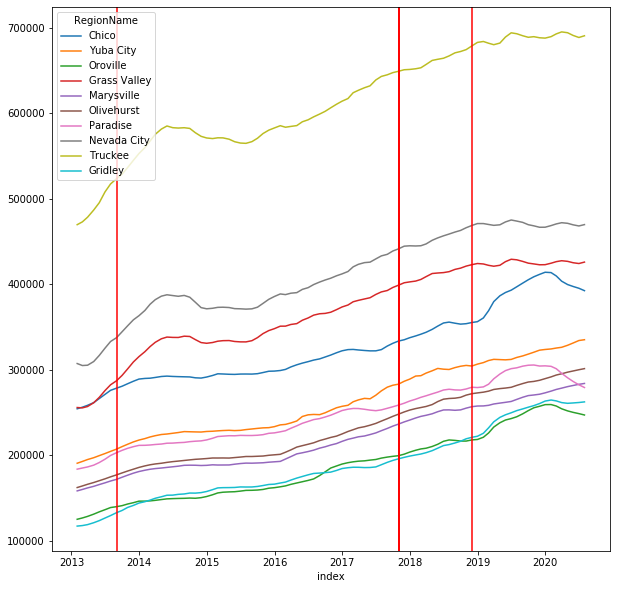

In [16]:
####Graph number 6



CityLine = TwoSingleCity_Fire[0][["RegionName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30']] 
CityLine = CityLine.head(10)
CityLine = CityLine.set_index('RegionName')
CityLine = CityLine.T
CityLine = CityLine.reset_index()

for index, row in CityLine.iterrows():
    date =""
    strdate = str(row[0])

    day = strdate.split('-')[2]
    month = strdate.split('-')[1]
    year = strdate.split('-')[0]
    day = int(day)
    month = int(month)
    year = int(year)
    number = 0
    if month == 1:
        CityLine.loc[index,'index'] = year +((day+28)/365)
    if month == 2:
        CityLine.loc[index,'index'] = year +((day+28+31)/365)   
    if month == 3:
        CityLine.loc[index,'index'] = year +((day+28+31+30)/365) 
    if month == 4:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31)/365) 
    if month == 5:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30)/365) 
    if month == 6:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31)/365) 
    if month == 7:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31)/365) 
    if month == 8:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30)/365) 
    if month == 9:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31)/365) 
    if month == 10:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30)/365)         
    if month == 11:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30+31)/365) 
    if month == 12:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30+31+31)/365) 
Twoline = CityLine.copy()




ax = Twoline.plot(x='index',figsize= (10,10))
for index, row in fillempty.iterrows():
    ax.axvline( row[1],color='red', label = row[0])
    
# plt.show()

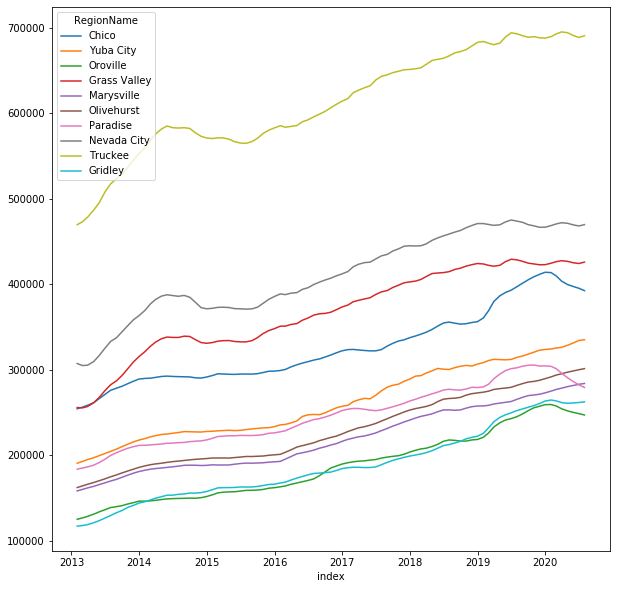

In [17]:
##Graph#3
ax = Twoline.plot(x='index',figsize= (10,10))

In [18]:
#####Graph number 4
heatcity = TwoSingleCity_Fire[0]
heatcity = heatcity[['RegionName','Latitude',"Longitude"]]

heatcity = heatcity.head(25)
                    
locationsheatcity = heatcity[['Latitude',"Longitude"]]

heatfire = TwoSingleCity_Fire[1]
heatfire = heatfire[['Name','AcresBurned','Latitude',"Longitude"]]
heatfire = heatfire.head(25)
locheatfire = heatfire[['Latitude','Longitude']]
heat = heatfire['AcresBurned'].astype(float)

fig = gmaps.figure()
heatH = gmaps.heatmap_layer(locheatfire,weights = heat,dissipating = False,
                           max_intensity = 1, point_radius = .01)


info_box_template = """
<dl>
<dt>City</dt><dd>{RegionName}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
cityinfo = [info_box_template.format(**row) for index, row in heatcity.iterrows()]
marker = gmaps.marker_layer(locationsheatcity, info_box_content = cityinfo) 
fig.add_layer(marker)
fig.add_layer(heatH)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#Create a list to hold the DF SACRAMENTO
ThreeSingleCity_Fire = []
#choose the Lat and Long
ThreeSingleCity_Fire =singlecity(38,39,-120,-122)
print(f'There are {ThreeSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {ThreeSingleCity_Fire[1]["Name"].count()} Fires')
#Choose DF to show
ThreeSingleCity_Fire[0].head()

#cleaning the City Data
#picking the columns
ThreeSingleCity_Fire[0] = ThreeSingleCity_Fire[0][["RegionName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30','Latitude',"Longitude"]] 
#if they are missing any data we drop the city 
ThreeSingleCity_Fire[0] = ThreeSingleCity_Fire[0].dropna(how='any')


#picking the columns we wanted 
ThreeSingleCity_Fire[1] = ThreeSingleCity_Fire[1][['Name','AcresBurned','ArchiveYear','Started','Extinguished','Latitude',"Longitude"]]
#dropping missing data 
ThreeSingleCity_Fire[1] = ThreeSingleCity_Fire[1].dropna(how= 'any')
#dropping the duplicates(there were duplicates for the counties)
ThreeSingleCity_Fire[1] = ThreeSingleCity_Fire[1].drop_duplicates(subset = 'Name')
# #organizing by achers burned
ThreeSingleCity_Fire[1] = ThreeSingleCity_Fire[1].sort_values(by ='AcresBurned',ascending = False)
# #creating DF for the Line plot graph#3

print(f'There are {ThreeSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {ThreeSingleCity_Fire[1]["Name"].count()} Fires')

There are 106 Cities
There are 95 Fires
There are 99 Cities
There are 85 Fires


In [20]:
emptycity =ThreeSingleCity_Fire[0].loc[ThreeSingleCity_Fire[0]['RegionName']=='Cow']

fillempty = ThreeSingleCity_Fire[1][['Name','Started']]
fillempty = fillempty.head(5)
firename = list(fillempty['Name'])
fillcount = 0
fillempty= pd.DataFrame(fillempty)
emptycity= pd.DataFrame(emptycity)
newcol = ""


fillempty

print(fillempty)
for index, row in fillempty.iterrows():
    date =""
    strdate = str(row[1])

    day = strdate.split('-')[2]
    month = strdate.split('-')[1]
    year = strdate.split('-')[0]
    day = int(day)
    month = int(month)
    year = int(year)
    number = 0
    if month == 1:
        fillempty.loc[index,'Started'] = year +((day)/365)
    if month == 2:
        fillempty.loc[index,'Started'] = year +((day+28)/365)   
    if month == 3:
        fillempty.loc[index,'Started'] = year +((day+28+31)/365) 
    if month == 4:
        fillempty.loc[index,'Started'] = year +((day+28+31+30)/365) 
    if month == 5:
        emptycity.loc[index,'Started'] = year +((day+28+31+30+31)/365) 
    if month == 6:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30)/365) 
    if month == 7:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31)/365) 
    if month == 8:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31)/365) 
    if month == 9:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30)/365) 
    if month == 10:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31)/365)         
    if month == 11:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31+30)/365) 
    if month == 12:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31+30+31)/365) 
fillempty


                Name     Started
162        King Fire  2014-09-30
1079    Waverly Fire  2018-06-30
444   Trailhead Fire  2016-06-30
182        Sand Fire  2014-07-31
1408     Caples Fire  2019-10-31


,Name,Started
162,King Fire,2014.75
1079,Waverly Fire,2018.49
444,Trailhead Fire,2016.49
182,Sand Fire,2014.58
1408,Caples Fire,2019.83


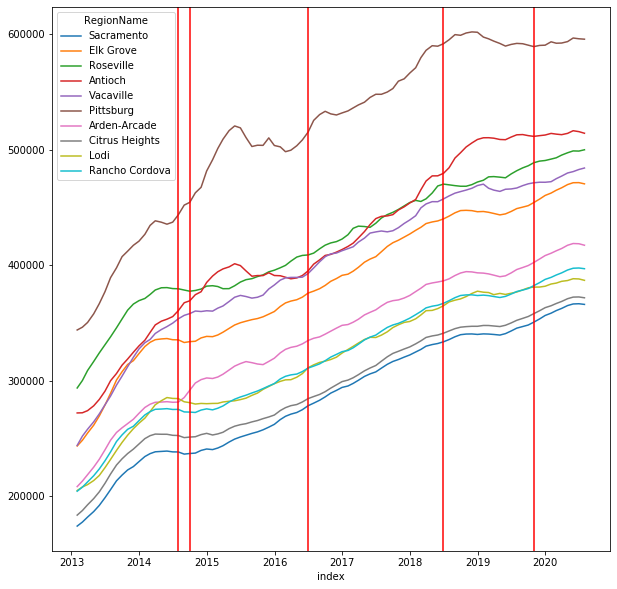

In [21]:
####Graph number 6




CityLine = ThreeSingleCity_Fire[0][["RegionName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30']] 
CityLine = CityLine.head(10)
CityLine = CityLine.set_index('RegionName')
CityLine = CityLine.T
CityLine = CityLine.reset_index()

for index, row in CityLine.iterrows():
    date =""
    strdate = str(row[0])

    day = strdate.split('-')[2]
    month = strdate.split('-')[1]
    year = strdate.split('-')[0]
    day = int(day)
    month = int(month)
    year = int(year)
    number = 0
    if month == 1:
        CityLine.loc[index,'index'] = year +((day+28)/365)
    if month == 2:
        CityLine.loc[index,'index'] = year +((day+28+31)/365)   
    if month == 3:
        CityLine.loc[index,'index'] = year +((day+28+31+30)/365) 
    if month == 4:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31)/365) 
    if month == 5:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30)/365) 
    if month == 6:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31)/365) 
    if month == 7:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31)/365) 
    if month == 8:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30)/365) 
    if month == 9:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31)/365) 
    if month == 10:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30)/365)         
    if month == 11:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30+31)/365) 
    if month == 12:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30+31+31)/365) 
Threeline = CityLine.copy()




ax = Threeline.plot(x='index',figsize= (10,10))
for index, row in fillempty.iterrows():
    ax.axvline( row[1],color='red', label = row[0])
    
# plt.show()

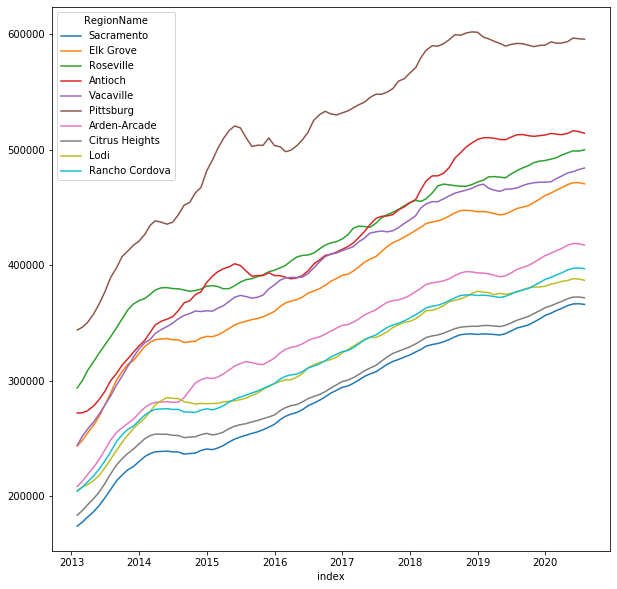

In [22]:
##Graph#3
ax = Threeline.plot(x='index',figsize= (10,10))

In [23]:
#####Graph number 4
heatcity = ThreeSingleCity_Fire[0]
heatcity = heatcity[['RegionName','Latitude',"Longitude"]]

heatcity = heatcity.head(25)
                    
locationsheatcity = heatcity[['Latitude',"Longitude"]]

heatfire = ThreeSingleCity_Fire[1]
heatfire = heatfire[['Name','AcresBurned','Latitude',"Longitude"]]
heatfire = heatfire.head(25)
locheatfire = heatfire[['Latitude','Longitude']]
heat = heatfire['AcresBurned'].astype(float)

fig = gmaps.figure()
heatH = gmaps.heatmap_layer(locheatfire,weights = heat,dissipating = False,
                           max_intensity = 1, point_radius = .01)


info_box_template = """
<dl>
<dt>City</dt><dd>{RegionName}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
cityinfo = [info_box_template.format(**row) for index, row in heatcity.iterrows()]
marker = gmaps.marker_layer(locationsheatcity, info_box_content = cityinfo) 
fig.add_layer(marker)
fig.add_layer(heatH)
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
#Create a list to hold the DF REDDING
FourSingleCity_Fire = []
#choose the Lat and Long
FourSingleCity_Fire =singlecity(40,41,-121,-123)
print(f'There are {FourSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {FourSingleCity_Fire[1]["Name"].count()} Fires')
#Choose DF to show
FourSingleCity_Fire[1]


#cleaning the City Data
#picking the columns
FourSingleCity_Fire[0] = FourSingleCity_Fire[0][["RegionName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30','Latitude',"Longitude"]] 
#if they are missing any data we drop the city 
FourSingleCity_Fire[0] = FourSingleCity_Fire[0].dropna(how='any')


#picking the columns we wanted 
FourSingleCity_Fire[1] = FourSingleCity_Fire[1][['Name','AcresBurned','ArchiveYear','Started','Extinguished','Latitude',"Longitude"]]
#dropping missing data 
FourSingleCity_Fire[1] = FourSingleCity_Fire[1].dropna(how= 'any')
#dropping the duplicates(there were duplicates for the counties)
FourSingleCity_Fire[1] = FourSingleCity_Fire[1].drop_duplicates(subset = 'Name')
#organizing by achers burned
FourSingleCity_Fire[1] = FourSingleCity_Fire[1].sort_values(by ='AcresBurned',ascending = False)
#creating DF for the Line plot graph#3
FourFireYears = FourSingleCity_Fire[1][['Name','ArchiveYear',"Extinguished"]]

print(f'There are {FourSingleCity_Fire[0]["RegionName"].count()} Cities')
print(f'There are {FourSingleCity_Fire[1]["Name"].count()} Fires')


There are 36 Cities
There are 107 Fires
There are 21 Cities
There are 97 Fires


In [25]:
emptycity =FourSingleCity_Fire[0].loc[FourSingleCity_Fire[0]['RegionName']=='Cow']

fillempty = FourSingleCity_Fire[1][['Name','Started']]
fillempty = fillempty.head(5)
firename = list(fillempty['Name'])
fillcount = 0
fillempty= pd.DataFrame(fillempty)
emptycity= pd.DataFrame(emptycity)
newcol = ""


fillempty

print(fillempty)
for index, row in fillempty.iterrows():
    date =""
    strdate = str(row[1])

    day = strdate.split('-')[2]
    month = strdate.split('-')[1]
    year = strdate.split('-')[0]
    day = int(day)
    month = int(month)
    year = int(year)
    number = 0
    if month == 1:
        fillempty.loc[index,'Started'] = year +((day)/365)
    if month == 2:
        fillempty.loc[index,'Started'] = year +((day+28)/365)   
    if month == 3:
        fillempty.loc[index,'Started'] = year +((day+28+31)/365) 
    if month == 4:
        fillempty.loc[index,'Started'] = year +((day+28+31+30)/365) 
    if month == 5:
        emptycity.loc[index,'Started'] = year +((day+28+31+30+31)/365) 
    if month == 6:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30)/365) 
    if month == 7:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31)/365) 
    if month == 8:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31)/365) 
    if month == 9:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30)/365) 
    if month == 10:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31)/365)         
    if month == 11:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31+30)/365) 
    if month == 12:
        fillempty.loc[index,'Started'] = year +((day+28+31+30+31+30+31+31+30+31+30+31)/365) 
fillempty


            Name     Started
1058   Carr Fire  2018-07-31
1066  Delta Fire  2018-09-30
1071   Hirz Fire  2018-08-31
164    Bald Fire  2014-07-31
167   Eiler Fire  2014-07-31


,Name,Started
1058,Carr Fire,2018.58
1066,Delta Fire,2018.75
1071,Hirz Fire,2018.67
164,Bald Fire,2014.58
167,Eiler Fire,2014.58


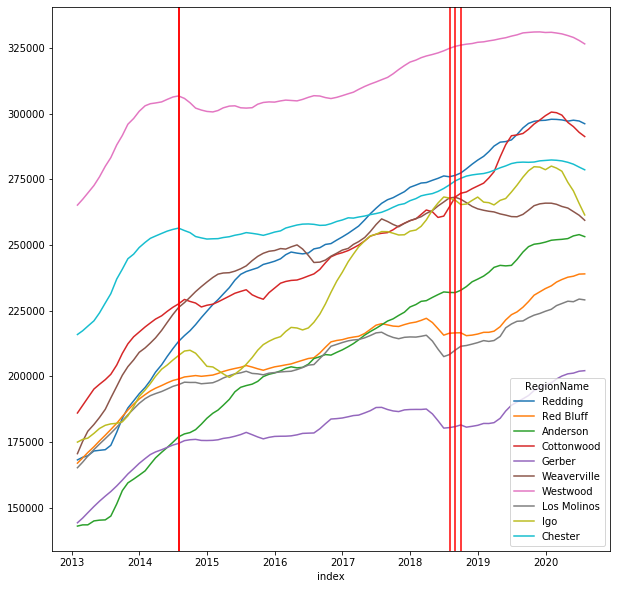

In [26]:
####Graph number 6



CityLine = FourSingleCity_Fire[0][["RegionName",'2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30']] 
CityLine = CityLine.head(10)
CityLine = CityLine.set_index('RegionName')
CityLine = CityLine.T
CityLine = CityLine.reset_index()

for index, row in CityLine.iterrows():
    date =""
    strdate = str(row[0])

    day = strdate.split('-')[2]
    month = strdate.split('-')[1]
    year = strdate.split('-')[0]
    day = int(day)
    month = int(month)
    year = int(year)
    number = 0
    if month == 1:
        CityLine.loc[index,'index'] = year +((day+28)/365)
    if month == 2:
        CityLine.loc[index,'index'] = year +((day+28+31)/365)   
    if month == 3:
        CityLine.loc[index,'index'] = year +((day+28+31+30)/365) 
    if month == 4:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31)/365) 
    if month == 5:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30)/365) 
    if month == 6:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31)/365) 
    if month == 7:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31)/365) 
    if month == 8:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30)/365) 
    if month == 9:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31)/365) 
    if month == 10:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30)/365)         
    if month == 11:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30+31)/365) 
    if month == 12:
        CityLine.loc[index,'index'] = year +((day+28+31+30+31+30+31+31+30+31+30+31+31)/365) 
Fourline = CityLine.copy()




ax = Fourline.plot(x='index',figsize= (10,10))
for index, row in fillempty.iterrows():
    ax.axvline( row[1],color='red', label = row[0])
    
# plt.show()

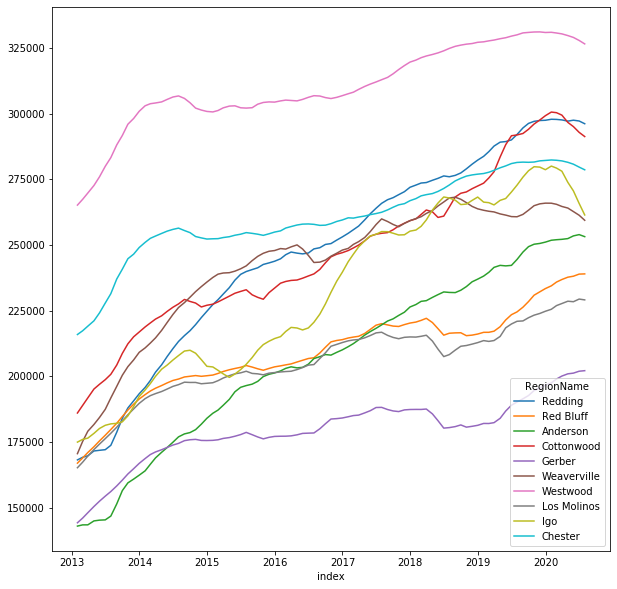

In [27]:
##Graph#3
ax = Fourline.plot(x='index',figsize= (10,10))

In [28]:
#####Graph number 4
heatcity = FourSingleCity_Fire[0]
heatcity = heatcity[['RegionName','Latitude',"Longitude"]]

heatcity = heatcity.head(25)
                    
locationsheatcity = heatcity[['Latitude',"Longitude"]]

heatfire = FourSingleCity_Fire[1]
heatfire = heatfire[['Name','AcresBurned','Latitude',"Longitude"]]
heatfire = heatfire.head(25)
locheatfire = heatfire[['Latitude','Longitude']]
heat = heatfire['AcresBurned'].astype(float)

fig = gmaps.figure()
heatH = gmaps.heatmap_layer(locheatfire,weights = heat,dissipating = False,
                           max_intensity = 1, point_radius = .01)


info_box_template = """
<dl>
<dt>City</dt><dd>{RegionName}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
cityinfo = [info_box_template.format(**row) for index, row in heatcity.iterrows()]
marker = gmaps.marker_layer(locationsheatcity, info_box_content = cityinfo) 
fig.add_layer(marker)
fig.add_layer(heatH)
fig

Figure(layout=FigureLayout(height='420px'))